In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d as conv2
from numpy import histogram as hist

sys.path.append('..')

In this exercise, you will first familiarise yourself with basic image filtering routines. In the second part, you will develop a simple image querying system that accepts a query image as input and then finds a set of similar images in the database. To compare images, you will implement some simple histogram-based distance functions and evaluate their performance in combination with different image representations.

### Question 1: Image Filtering (10 points)

**Q1.1** Implement a method `gauss` in `utils/image_filtering.py` that computes the values of a 1-D Gaussian for a given variance $\sigma^2$. The method should also return a vector of integers on which we define the Gaussian filter: as common practice, return integers in the interval $[-3\sigma,3\sigma]$.
  
\begin{equation}
  G=\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{x^2}{2\sigma^2}).
\end{equation}

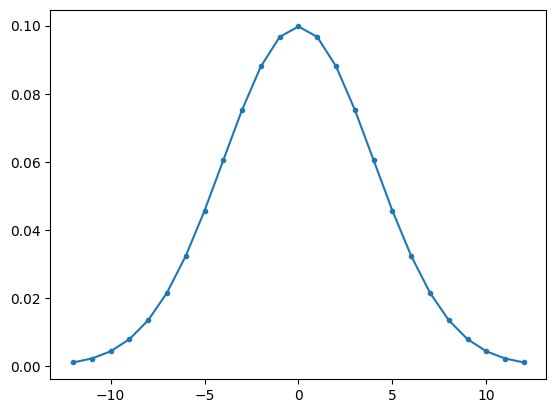

In [2]:
from utils.image_filtering import gauss

### The following code is used for evaluation.

sigma = 4.0
[gx, x] = gauss(sigma)

plt.figure()
plt.plot(x, gx, '.-')
plt.show()

**Q1.2** Implement a 2D Gaussian filter `gaussianfilter` in `utils/image_filtering.py`. The function should take an image as an input and return the result of the convolution of this image a with 2D Gaussian kernel of given variance $\sigma^2$. See **Figure 1** for an illustration of Gaussian filtering. You can take advantage of the `convolve2d` function from the `scipy` library if you don't want to implement convolution yourself.

*Hint: use the fact that the 2D Gaussian filter is separable to speed up computations.*

**Figure 1: Left: Original image. Right: Image after applying a Gaussian filter with $\sigma = 4.0$.**

<!-- <img src="../../data/exercise-1/not_smooth.png" width="300" align=left />
<img src="../../data/exercise-1/smooth.png" width="300" align=left /> -->
![](../../data/exercise-1/not_smooth.png)
![](../../data/exercise-1/smooth.png)

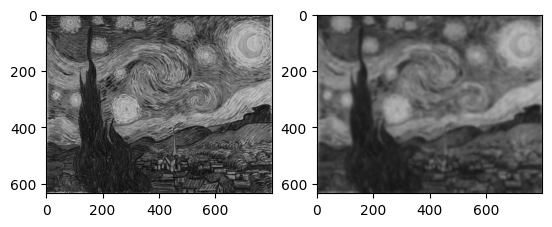

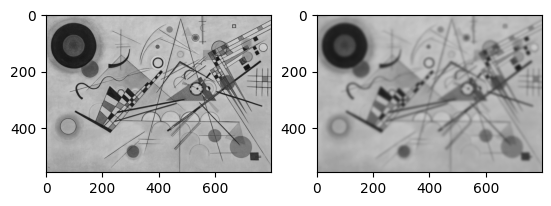

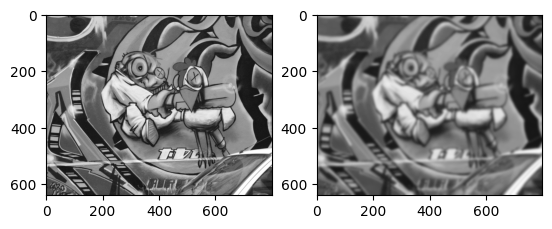

In [3]:
from utils.image_filtering import gaussianfilter, rgb2gray

### The following code is used for evaluation.

def run_one_img_q1_2(image_path):
    img = rgb2gray(np.array(Image.open(image_path)))
    smooth_img = gaussianfilter(img, sigma)

    plt.figure()
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    plt.sca(ax1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.sca(ax2)
    plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
run_one_img_q1_2('../../data/exercise-1/night.png')
run_one_img_q1_2('../../data/exercise-1/kand.png')
run_one_img_q1_2('../../data/exercise-1/graf.png')

**Q1.3** Implement a function `gaussdx` in `utils/image_filtering.py` for creating a Gaussian derivative filter in 1D according to the following equation:

\begin{equation}
    \frac{d}{dx}G = \frac{d}{dx}\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{x^2}{2\sigma^2})\\
    = -\frac{1}{\sqrt{2\pi}\sigma^3}x \exp(-\frac{x^2}{2\sigma^2})
\end{equation}

The effect of applying a filter can be studied by observing its
so-called $\textit{impulse response}$. For this, create a test image
in which only the central pixel has a non-zero value:

```
  imgImp = np.zeros((27,27))
  imgImp[13,13] = 1.0
```

Now, create the following 1D filter kernels $G$ and $D$.

```
  sigma = 7.0
  G = gauss(sigma)
  D = gaussdx(sigma)
```

What happens when you apply the following filter combinations?
- first $G$,  then $G^T$;
- first $G$,  then $D^T$;
- first $D$,  then $G^T$;
- first $G^T$, then $D$;
- first $D^T$, then $G$,

where $G^T$ refers to the transpose of vector $G$.
Visualize the results and summarize in the cell below.

Observations:
- When we first apply G and than later G.T, this is equivalent to 2D gaussian kernal. Its output shows that a Gaussian function convolve with impulse function, its result is 2D guassian function. 
- Applying first G kernal to the impulse function result in a gaussain function from range of [-3sigma to +3sigma] in the middle. One can imagine it as line along x axis. Convolving D.T on top of it, represent change along Y-axis. 
- From the property, (GD.T).T = DG.T, which is similar to previous case. Transpose of symmetric matix is eqaual to itself. Hence the plot is same. We can also consider convolution and correlation same as the matrix is symmetric. 
- Applying first G.T smooths the impulse function in Y-axis. Whcih again result a line in y-axis from [-3sigma to +3sigma]. D filter is used to find the edges in X-axis. Convolving D on top of it, represent change along X-axis.
- (G.TD).T = D.TG and these matrice are symmetric. Convolving a Image with A or A.T when A is symmetric have same results. Hence the equivalent image is same as previous case. 

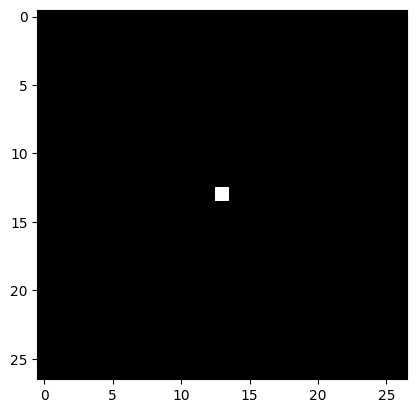

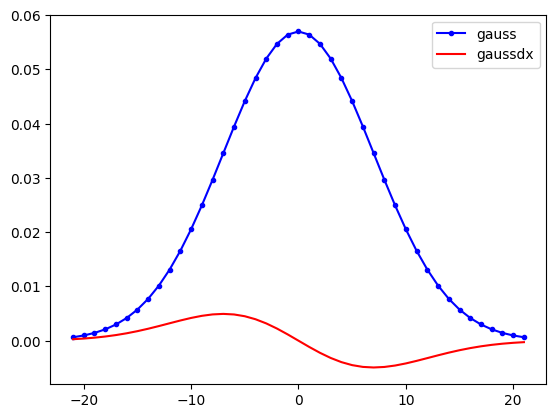

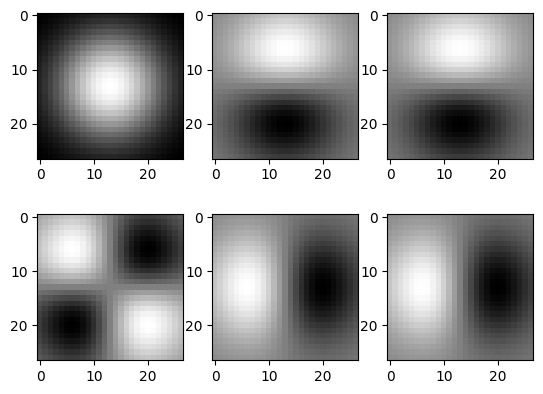

In [4]:
from utils.image_filtering import gaussdx

### The following code is used for evaluation.

img = np.zeros([27,27])
img[13, 13] = 1.0
plt.figure(), plt.imshow(img, cmap='gray')

sigma = 7.0
[G, x] = gauss(sigma)
[D, x] = gaussdx(sigma)

plt.figure()
plt.plot(x, G, 'b.-')
plt.plot(x, D, 'r-')
plt.legend( ('gauss', 'gaussdx'))
plt.show()

G = G.reshape(1, G.size)
D = D.reshape(1, D.size)

plt.figure()
plt.subplot(2,3,1)
plt.imshow(conv2(conv2(img, G, 'same'), G.T, 'same') , cmap='gray')
plt.subplot(2,3,2)
plt.imshow(conv2(conv2(img, G, 'same'), D.T, 'same') , cmap='gray')
plt.subplot(2,3,3)
plt.imshow(conv2(conv2(img, D.T, 'same'), G, 'same') , cmap='gray')
plt.subplot(2,3,4)
plt.imshow(conv2(conv2(img, D, 'same'), D.T, 'same') , cmap='gray')
plt.subplot(2,3,5)
plt.imshow(conv2(conv2(img, D, 'same'), G.T, 'same') , cmap='gray')
plt.subplot(2,3,6)
plt.imshow(conv2(conv2(img, G.T, 'same'), D, 'same') , cmap='gray')
plt.show()

**Q1.4** Use the functions `gauss` and `gaussdx` in order to implement a function `gaussderiv` in `utils/image_filtering.py` that returns the 2D Gaussian derivatives of an input image in x and y direction. Try the function on the three test images.

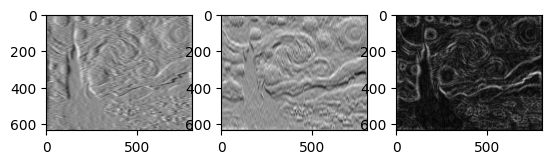

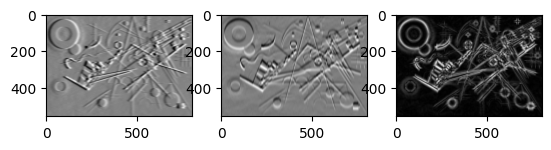

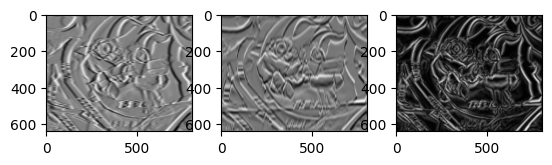

In [5]:
from utils.image_filtering import gaussderiv

### The following code is used for evaluation.

def run_one_img_q1_4(image_path):
    img_c = np.array(Image.open(image_path)).astype('double')
    img = rgb2gray(img_c)
    [imgDx, imgDy] = gaussderiv(img, 7.0)

    plt.figure()
    ax1 = plt.subplot(1,3,1)
    ax2 = plt.subplot(1,3,2)
    ax3 = plt.subplot(1,3,3)
    plt.sca(ax1)
    plt.imshow(imgDx, cmap='gray')
    plt.sca(ax2)
    plt.imshow(imgDy, cmap='gray')
    plt.sca(ax3)
    imgmag = np.sqrt(imgDx**2 + imgDy**2)
    plt.imshow(imgmag, cmap='gray')
    plt.show()
    
run_one_img_q1_4('../../data/exercise-1/night.png')
run_one_img_q1_4('../../data/exercise-1/kand.png')
run_one_img_q1_4('../../data/exercise-1/graf.png')

### Question 2: Image Representations and Histogram Distances (10 points)

**Q2.1** Implement a function `normalized_histogram` in `utils/image_histograms.py`, which takes a gray-value image as input and returns a normalized histogram of pixel intensities. Compare your implementation with the built-in Python function `numpy.histogram`. Your histograms and the histograms computed with Python should be approximately the same, except for the overall scale, which will be different since `numpy.histogram` does not normalize its output.

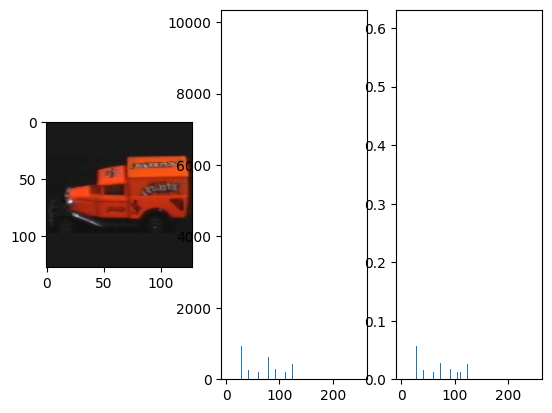

In [6]:
from utils.image_histograms import normalized_histogram

### The following code is used for evaluation.

img_color = np.array(Image.open('../../data/exercise-1/model/obj100__0.png'))
img_gray = rgb2gray(img_color.astype('double'))

plt.figure()
plt.subplot(1,3,1)
plt.imshow(img_color)

plt.subplot(1,3,2)
num_bins_gray = 40
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0,255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1)

plt.subplot(1,3,3)
hist_gray2, bin_gray2 = normalized_histogram(img_gray, num_bins_gray)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2)
plt.show()

**Q2.2** Implement other histogram types discussed during the tutorial (refer to the introduction slides). Your implementation should extend the code provided in the functions `rgb_hist`, `rg_hist`, and `dxdy_hist` in `utils/image_histograms.py`. Make sure that you are using the correct range of pixel values. For “RGB” the pixel intensities are in \[0, 255\], for “rg” the values are normalized to be in \[0, 1\]. For the derivatives histograms the values depend on the σ2 of the Gaussian filter; with σ = 7.0 you can assume that the values are in the range \[−32, 32\].

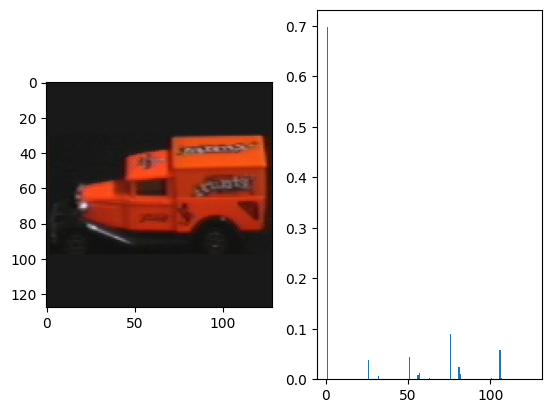

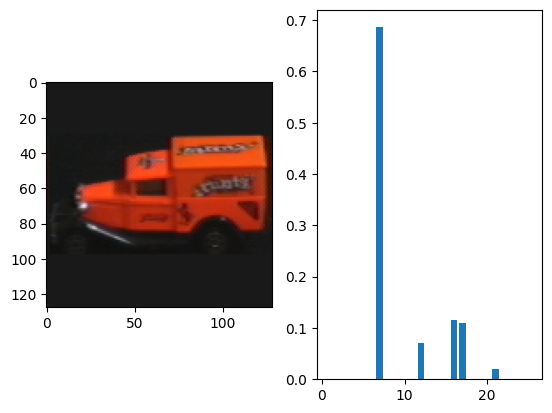

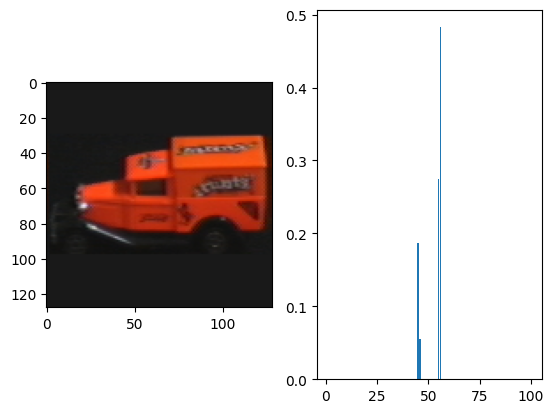

In [7]:
from utils.image_histograms import rgb_hist, rg_hist, dxdy_hist
### The following code is used for evaluation.

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rgb1 = rgb_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rgb1.size+1)),hist_rgb1)
plt.show()

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_color)

plt.subplot(1,2,2)
num_bins_rg = 5
hist_rg = rg_hist(img_color.astype('double'), num_bins_rg)
plt.bar(np.array(range(1,hist_rg.size+1)),hist_rg)
plt.show()

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_dxdy = 10
plt.subplot(1,2,2)
hist_dxdy = dxdy_hist(img_gray.astype('double'), num_bins_dxdy)
plt.bar(np.array(range(1,hist_dxdy.size+1)),hist_dxdy)
plt.show()

**Q2.3** Implement the histogram distance functions discussed during the tutorial (refer to the introduction slides), by filling the missing code in the functions `dist_l2`, `dist_intersect`, and `dist_chi2` in `utils/image_histograms.py`.

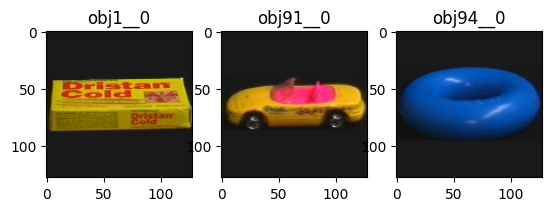

distance functions:
['l2', 'intersect', 'chi2']


histogram types:
['grayvalue', 'rgb', 'rg', 'dxdy']


compare image "obj1__0" to "obj91__0":
[[0.05760147 0.05563829 0.11350724 0.0906438 ]
 [0.13391113 0.29534912 0.23632812 0.20654297]
 [0.10574426 0.50922908 0.36012687 0.17568328]]


compare image "obj1__0" to "obj94__0":
[[0.13088992 0.12637193 0.22887503 0.09314173]
 [0.36340332 0.47009277 0.46569824 0.31652832]
 [0.53934532 0.84420335 0.831331   0.44407402]]




In [8]:
from utils.image_histograms import get_dist_by_name, get_hist_by_name, is_grayvalue_hist

### The following code is used for evaluation.

image_files1 = ['../../data/exercise-1/model/obj1__0.png']
image_files2 = ['../../data/exercise-1/model/obj91__0.png', '../../data/exercise-1/model/obj94__0.png']

plt.figure()
plt.subplot(1,3,1); plt.imshow(np.array(Image.open(image_files1[0])), vmin=0, vmax=255); plt.title(image_files1[0].split('/')[-1].split('.')[0])
plt.subplot(1,3,2); plt.imshow(np.array(Image.open(image_files2[0])), vmin=0, vmax=255); plt.title(image_files2[0].split('/')[-1].split('.')[0])
plt.subplot(1,3,3); plt.imshow(np.array(Image.open(image_files2[1])), vmin=0, vmax=255); plt.title(image_files2[1].split('/')[-1].split('.')[0])
plt.show()


print('distance functions:')
distance_types = ['l2', 'intersect', 'chi2']
print(distance_types)
print('\n')

print('histogram types:')
hist_types = ['grayvalue', 'rgb', 'rg', 'dxdy']
print(hist_types)
print('\n')

num_bins_color = 30
num_bins_gray = 90

for imgidx1 in range(len(image_files1)):
    img1_color = np.array(Image.open(image_files1[imgidx1]))
    img1_gray = rgb2gray(img1_color.astype('double'))
    img1_color = img1_color.astype('double')

    for imgidx2 in range(len(image_files2)):
        img2_color = np.array(Image.open(image_files2[imgidx2]))
        img2_gray = rgb2gray(img2_color.astype('double'))
        img2_color = img2_color.astype('double')

        D = np.zeros( (len(distance_types), len(hist_types)) )

        for didx in range(len(distance_types)):

            for hidx in range(len(hist_types)):

                if is_grayvalue_hist(hist_types[hidx]):
                  hist1 = get_hist_by_name(img1_gray, num_bins_gray, hist_types[hidx])
                  hist2 = get_hist_by_name(img2_gray, num_bins_gray, hist_types[hidx])

                  if len(hist1) == 2 and len(hist1[0]) > 1:
                      hist1 = hist1[0]
                  if len(hist2) == 2 and len(hist2[0]) > 1:
                      hist2 = hist2[0]

                  D[didx,hidx] = get_dist_by_name(hist1, hist2, distance_types[didx])
                
                else:
                  
                  hist1 = get_hist_by_name(img1_color, num_bins_color, hist_types[hidx])
                  hist2 = get_hist_by_name(img2_color, num_bins_color, hist_types[hidx])

                  if len(hist1) == 2 and len(hist1[0]) > 1:
                      hist1 = hist1[0]
                  if len(hist2) == 2 and len(hist2[0]) > 1:
                      hist2 = hist2[0]

                  D[didx, hidx] = get_dist_by_name(hist1, hist2, distance_types[didx])

        print('compare image "%s" to "%s":'% (image_files1[imgidx1].split('/')[-1].split('.')[0], image_files2[imgidx2].split('/')[-1].split('.')[0]))
        print(D)
        print('\n')


### Question 3: Object Identification (10 points)

**Q3.1** Having implemented different distance functions and image histograms, we can now test how suitable they are for retrieving images in a query-by-example scenario. Implement a function `find_best_match` in `utils/object_identification.py`, which takes a list of model images and a list of query images and for each query image returns the index of the closest model image. The function should take string parameters, which identify the distance function, the histogram function, and the number of histogram bins. See the comments at the beginning of `find_best_match` for more details. Aside from the indices of the best matching images, your implementation should also return a matrix that contains the distances between all pairs of model and query images.

In [9]:
from utils.object_identification import find_best_match

### The following code is used for evaluation.

with open('../../data/exercise-1/model.txt') as fp:
    model_images = fp.readlines()
model_images = [x.strip() for x in model_images] 

with open('../../data/exercise-1/query.txt') as fp:
    query_images = fp.readlines()
query_images = [x.strip() for x in query_images] 

eval_dist_type = 'intersect'
eval_hist_type = 'rg'
eval_num_bins = 30

[best_match, D] = find_best_match(model_images, query_images, eval_dist_type, eval_hist_type, eval_num_bins)

print(best_match)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 48, 34, 35, 67, 37, 38, 39, 40, 58, 42, 10, 44, 45, 46, 4, 48, 49, 50, 51, 52, 1, 54, 55, 23, 57, 58, 59, 60, 61, 31, 10, 61, 45, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 41, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88]


**Q3.2** Implement a function `show_neighbors` in `utils/object_identification.py` that takes a list of model images and a list of query images and for each query image visualizes several model images which are the closest to the query image according to the specified distance metric. Use the function `find_best_match` in your implementation. See **Figure 2** for an example output.

**Figure 2: A query image and the model images with color histograms similar to the query image.**

<!-- <img src="../../data/exercise-1/fig2.png" width="600" align=left /> -->
![](../../data/exercise-1/fig2.png)

<Figure size 640x480 with 0 Axes>

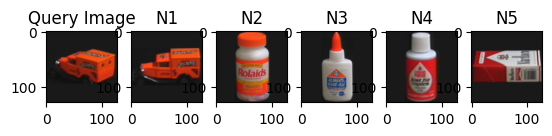

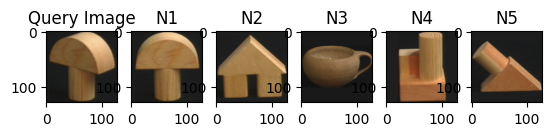

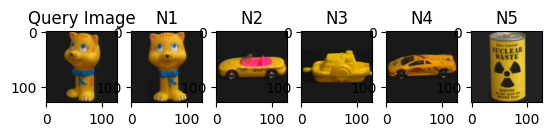

In [10]:
from utils.object_identification import show_neighbors

### The following code is used for evaluation.

query_images_vis = [query_images[i] for i in np.array([0,4,9])]
show_neighbors(model_images, query_images_vis, eval_dist_type, eval_hist_type, eval_num_bins)

### Question 4: Performance Evaluation (10 points)

**Q4.1** Sometimes instead of returning the best match for a query image, we would like to return all the model images with a distance to the query image below a certain threshold. It is, for example, the
case when there are multiple images of the query object among the model images. In order to assess
  the system performance in such scenario, we will use two quality measures: precision and
  recall. Denoting the threshold on the distance between the images by $\tau$ and using the following
  notation:


TP (True Positive) = number of correct matches among the images with distance smaller than $\tau$,
<br>
FP (False Positive) = number of incorrect matches among the images with distance smaller than $\tau$,
<br>
TN (True Negative) = number of incorrect matches among the images with distance larger than $\tau$,
<br>
FN (False Negative) = number of correct matches among the images with distance larger than $\tau$,


precision is given by
\begin{equation}
precision = \frac{TP}{TP + FP},
\end{equation}
and recall is given by
\begin{equation}
recall = \frac{TP}{TP + FN}.
\end{equation}

For an ideal system, there should exist a value of $\tau$ such that
both precision and recall are equal to $1$, which corresponds to
obtaining all the correct images without any false matches. However, in
reality both quantities will be somewhere in the range between $0$ and
$1$ and the goal is to make both of them as high as possible.

Implement a function `plot_rpc` in `utils/performance_evaluation.py` that you have to compute
precision/recall pairs for a range of threshold values and then output
the precision/recall curve (RPC), which gives a good summary of system
performance at different levels of confidence. See **Figure 3** for an example of an RPC curve.

**Q4.2** Plot RPC curves for different histogram types, distances, and number of bins. Submit a summary of your observations as part of your solution.

**Figure 3: Recall/precision curve evaluated on the provided set of model and query images.**

<!-- <img src="../../data/exercise-1/fig3.png" width="400" align=left /> -->
![](../../data/exercise-1/fig3.png)

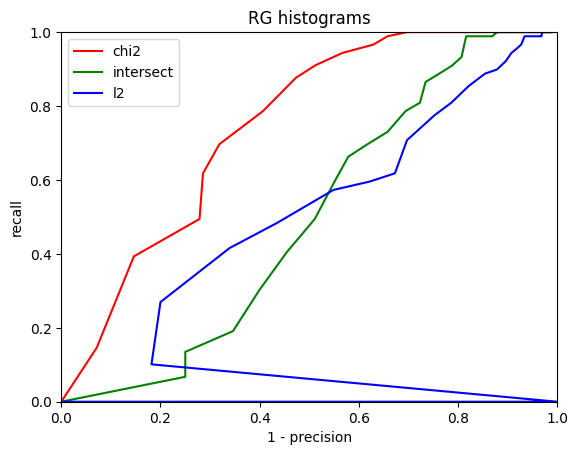

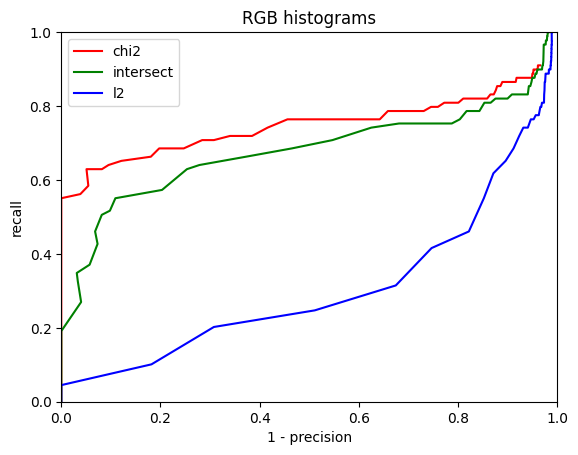

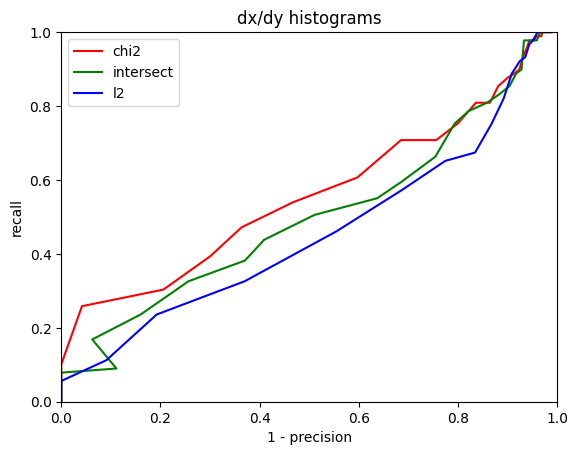

In [11]:
from utils.performance_evaluation import compare_dist_rpc

# The following code is used for evaluation.

with open('../../data/exercise-1/model.txt') as fp:
    model_images = fp.readlines()
model_images = [x.strip() for x in model_images] 

with open('../../data/exercise-1/query.txt') as fp:
    query_images = fp.readlines()
query_images = [x.strip() for x in query_images] 

eval_num_bins = 20

plt.figure()
compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rg', eval_num_bins, ['r', 'g', 'b'])
plt.title('RG histograms')
plt.show()

plt.figure()
compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rgb', eval_num_bins, ['r', 'g', 'b'])
plt.title('RGB histograms')
plt.show()

plt.figure()
compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'dxdy', eval_num_bins, ['r', 'g', 'b'])
plt.title('dx/dy histograms')
plt.show()

Summarize your observations here: \
From the above plots we have teh folowing observation: 
- Chi square distance is the best distance metric followed by intersect and than l2. 
- RGB histogram is the best colour/histogram space in this case because it has the maximum Area under the curve. 
- Precision and recall follows a kind of inverse relation. 